In [5]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [6]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [7]:
data_path = '../../../data'

In [8]:
train_path = os.path.join(data_path, '심리/train.csv')
train = pd.read_csv(train_path, index_col=0)

* Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리   
    Qa : Secret   
    Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.   
    Qc : Anyone who completely trusts anyone else is asking for trouble.   
    Qd : Secret   
    Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.   
    Qf : There is no excuse for lying to someone else.   
    Qg : Secret   
    Qh : Most people forget more easily the death of their parents than the loss of their property.   
    Qi : Secret   
    Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.   
    Qk : All in all, it is better to be humble and honest than to be important and dishonest.   
    Ql : Secret   
    Qm : It is hard to get ahead without cutting corners here and there.   
    Qn : Secret   
    Qo : The best way to handle people is to tell them what they want to hear.   
    Qp : Secret   
    Qq : Most people are basically good and kind.   
    Qr : One should take action only when sure it is morally right.   
    Qs : It is wise to flatter important people.   
    Qt : Secret   
   
   
    1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.   
   
   

* Q_E(a~t) : 질문을 답할 때까지의 시간


* age_group : 연령


* education : 교육 수준   
    1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


* engnat : 모국어가 영어   
    1=Yes, 2=No, 0=무응답


* familysize : 형제자매 수


* gender : 성별   
    Male, Female


* hand : 필기하는 손   
    1=Right, 2=Left, 3=Both, 0=무응답


* married : 혼인 상태   
    1=Never married, 2=Currently married, 3=Previously married, 0=Other


* race : 인종   
    Asian, Arab, Black, Indigenous Australian, Native American, White, Other


* religion : 종교   
    Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


* tp__(01~07) : items were rated "I see myself as:" _____ such that   
    tp01 : Extraverted, enthusiastic.   
    tp02 : Critical, quarrelsome.   
    tp03 : Dependable, self-disciplined.   
    tp04 : Anxious, easily upset.   
    tp05 : Open to new experiences, complex.   
    tp06 : Reserved, quiet.   
    tp07 : Sympathetic, warm.   
    tp08 : Disorganized, careless.   
    tp09 : Calm, emotionally stable.   
    tp10 : Conventional, uncreative.   
    순서형 변수

							



* urban : 유년기의 거주 구역   
    1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답




* wr_(01~13) : 실존하는 해당 단어의 정의을 앎   
    1=Yes, 0=No
* wf_(01~03) : 허구인 단어의 정의를 앎   
    1=Yes, 0=No


* voted (타겟): 지난 해 국가 선거 투표 여부   
    1=Yes, 2=No

In [9]:
# Null 값, 데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [10]:
# 중복 확인
train.duplicated().sum()

0

In [11]:
features = train.drop(['voted'], axis=1)
target = train['voted']

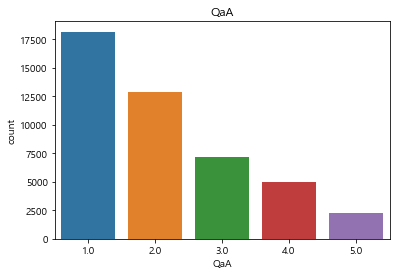

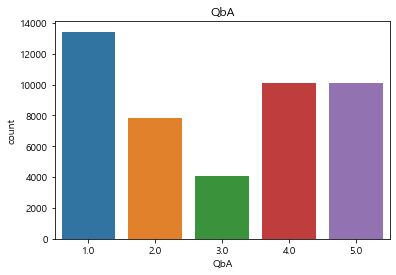

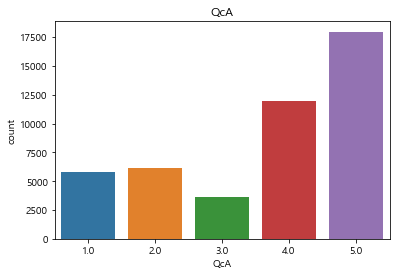

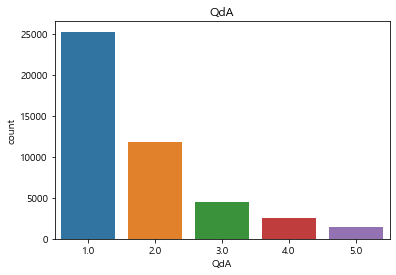

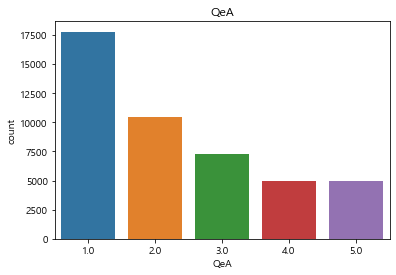

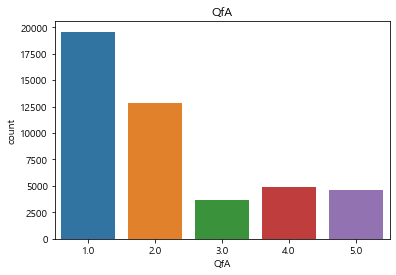

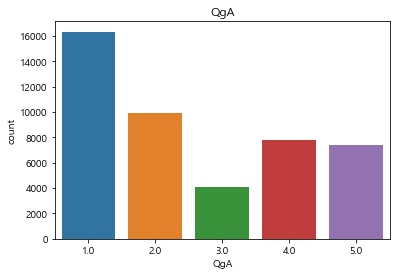

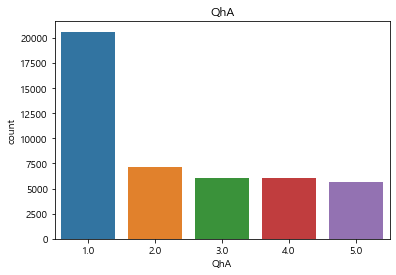

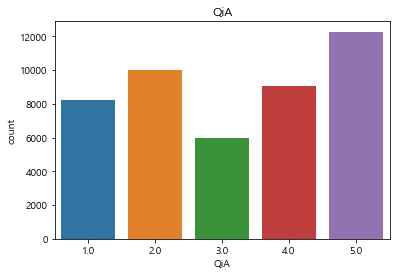

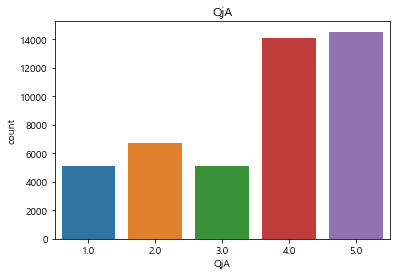

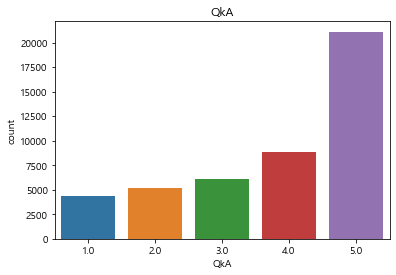

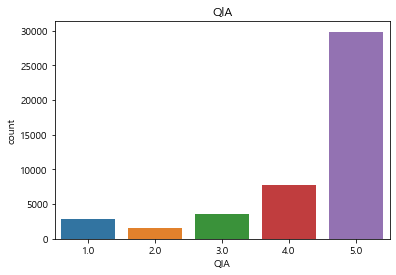

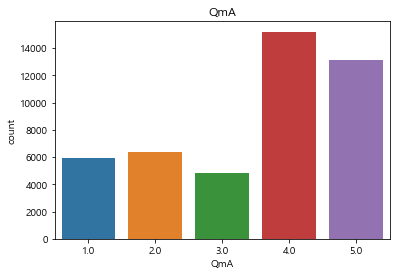

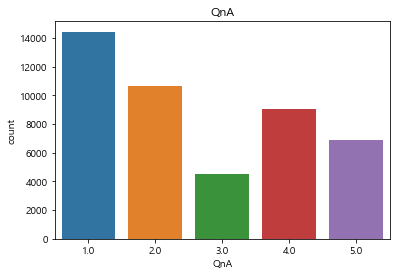

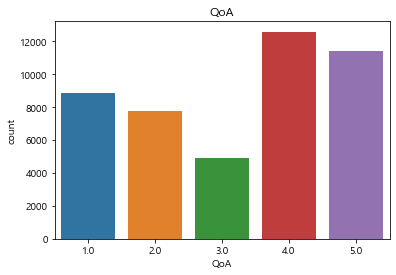

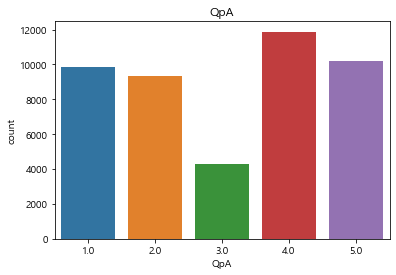

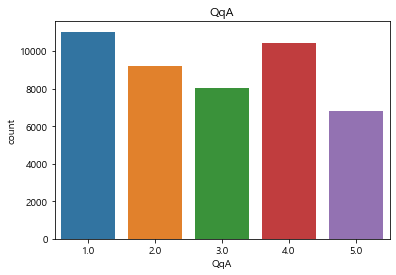

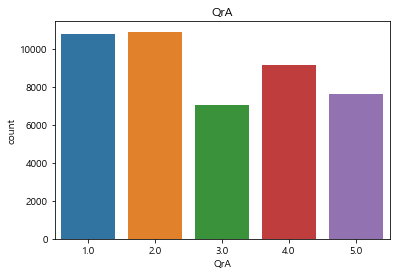

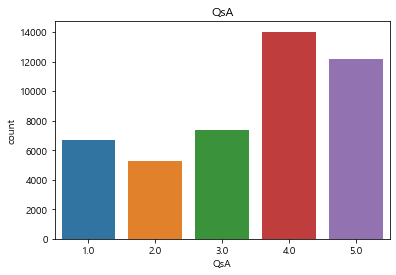

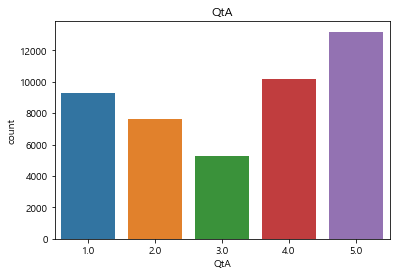

In [12]:
# 질문
Q_answer = [x for x in features.columns if re.match('Q.A', x)]

for col in Q_answer:
    sns.countplot(x=features[col])
    plt.title(col)
    plt.show()

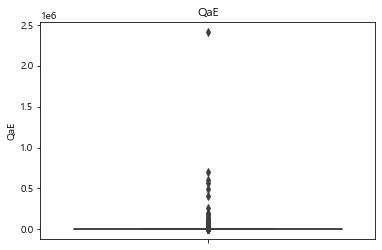

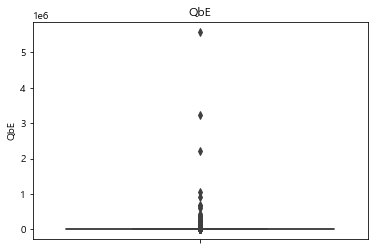

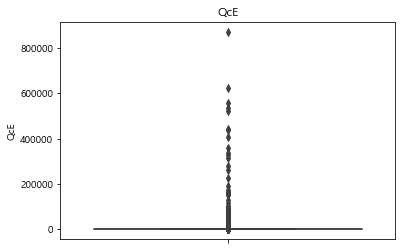

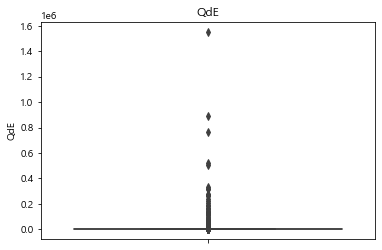

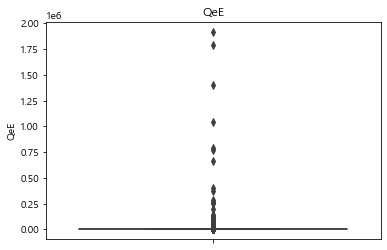

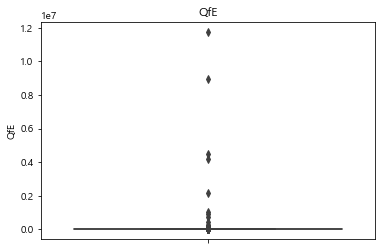

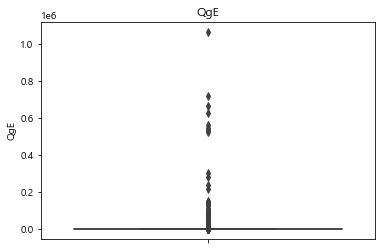

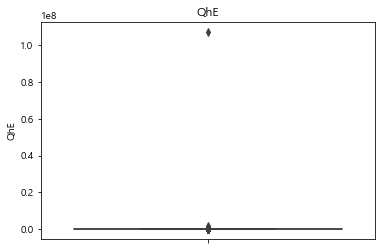

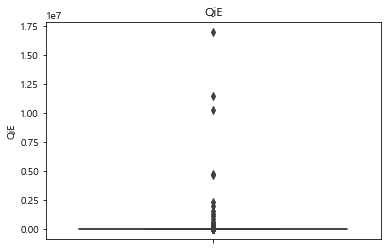

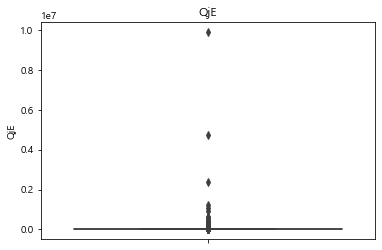

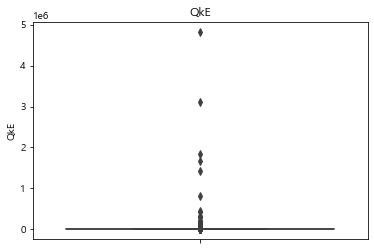

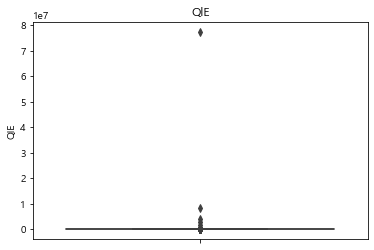

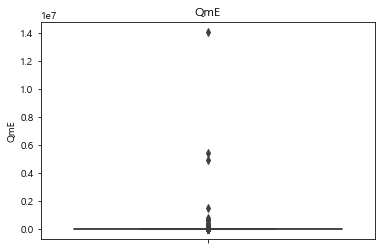

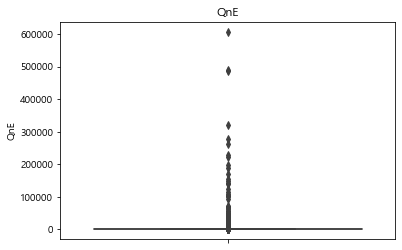

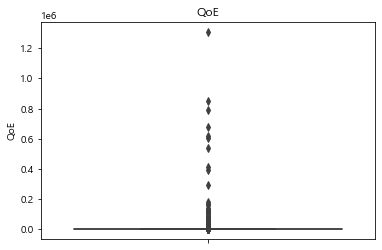

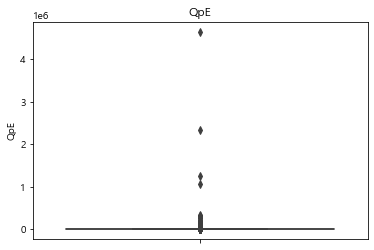

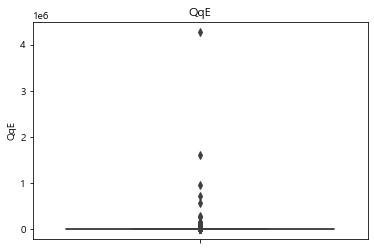

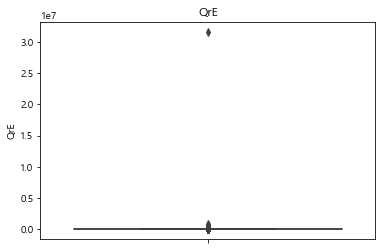

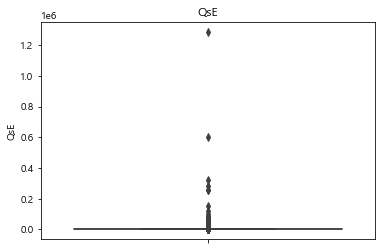

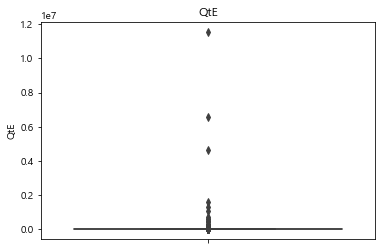

In [29]:
# 시간
Q_time = [x for x in features.columns if re.match('Q.E', x)]

for col in Q_time:
    sns.boxplot(y=features[col])
    plt.title(col)
    plt.show()

In [33]:
# 연령
age_ = features['age_group'].unique()



['+70s', '10s', '20s', '30s', '40s', '50s', '60s']